In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from google.colab import files
from google.colab import drive
import numpy as np
#@title Import Statements`
!pip install PyGithub

# Package Imports
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from urllib.request import urlopen # The default requests package
import requests # For making GitHub requests
from pprint import pprint # For pretty printing
from pathlib import Path # The Path class

# For the more advanced requests
import base64
import os
import sys
sys.path.append("./PyGithub");
from github import Github
from getpass import getpass


     |████████████████████████████████| 296kB 5.1MB/s 


In [2]:
#@title Function Definitions
# Recursively Import the Data (AUTOMATIC)

def _decode_and_write(file__, path_):
    data = file__.decoded_content
    data = data.decode('utf-8')[1:]
    with open(path_, 'w') as writefile:
        writefile.write(data) 
    data = data.splitlines()
    data_rows = []
    for count, word in enumerate(data):
        if count>0:
            data_rows.append(word.split(','))
    data = pd.DataFrame(data_rows)
    data = data.to_numpy()
    return data


def import_github(path_name="AllLyrics.txt"):
    """
    Function for importing the github file
    path_name: str
    output: None
    """
    g = Github(getpass("Enter your PAT key ")) # Enter your PAT Key.
    username = "MikeMNelhams"
    main_branch_bool = input("Main Branch: Yes or No? ")
    yes_synonyms = ["yes", "y", "yh", "1", "true"]
    if main_branch_bool.lower() in yes_synonyms: 
        branch = "master" 
    else: 
        branch = "PROTOTYPE"

    user = g.get_user(username)
    r_proj_clone = 0
    for repo in g.get_user().get_repos():
        if repo.name == "ai-group-project-Team-JMJM":
            r_proj_clone = repo
            break
        # To see all the available attributes and methods
        print(dir(repo))
    if not r_proj_clone:
        print("ai-group-project-Team-JMJM not found")
        sys.exit()
    print("Importing Github cleaned text files...")
    contents = r_proj_clone.get_contents("RapLyrics/CLEAN", ref=branch)
    RAP_DATA = []
    for file_ in contents:
        path = file_.path
        path = str(path) 
        # Only choose the .txt files
        if path[-4:] == '.txt':
            # Append the Lyrics
            RAP_DATA.append(file_.decoded_content.decode("utf-8")) 
    
    temp_path = Path(path_name)
    if temp_path.is_file(): 
        if os.stat(path_name).st_size == 0:
            write_bool2 = True
        else: 
            write_bool2 = False
    else: 
        write_bool2 = True
    
    if write_bool2: 
        for lyric in RAP_DATA: 
            try:
                with open(path_name, 'w') as writefile: 
                    writefile.write(lyric)
            except: 
                print("Error, file moved/deleted during write")
        print("{} is now up to date!".format(path_name))
    else: 
        print("{} is already up to date!".format(path_name))
    
    contents = r_proj_clone.get_contents("RapLyrics/Other", ref=branch)
    for counter, file_ in enumerate(contents):
        path = file_.path
        path = str(path) 

        title_start = path.find('Other')
        title_len = path[title_start:].find('.')
        path = path[title_start + 6:title_start + title_len + 4]

        print("Writing file {} {}".format(counter, path))
        temp_path = Path(path)
        if temp_path.is_file():
            with open(path,'w'): pass # Cheeky way to clear the file if it exists
        
        # Split the long string into a list of lines, then split by words, then put into a csv, then to numpy array 
        data = file_.decoded_content
        data = data.decode('utf-8')[1:]

        with open(path, 'w') as writefile:
            writefile.write(data) 
        print("All files now up to date!")


def update_github(write_bool=False, path_name="AllLyrics.txt"):
    """
    Function for updating the github file, by cleaning the lyrics, optional write to txt file. 
    write_bool: bool
    path_name: str
    output: None
    """
    g = Github(getpass("Enter your PAT key ")) # Enter your PAT Key.
    username = "MikeMNelhams"
    main_branch_bool = input("Main Branch: Yes or No? ")
    yes_synonyms = ["yes", "y", "yh", "1", "true"]
    if main_branch_bool.lower() in yes_synonyms: 
        branch = "master" 
    else: 
        branch = "PROTOTYPE"

    user = g.get_user(username)
    r_proj_clone = 0
    for repo in g.get_user().get_repos():
        if repo.name == "ai-group-project-Team-JMJM":
            r_proj_clone = repo
            break
        # To see all the available attributes and methods
        print(dir(repo))
    
    if not r_proj_clone:
        print("ai-group-project-Team-JMJM not found")
        sys.exit()

    print("Importing editing csv files...")

    # Split the long string into a list of lines, then split by words, then put into a csv, then to numpy arr
    contents = r_proj_clone.get_contents("RapLyrics/Other", ref=branch)
    for counter, file_ in enumerate(contents):
        path = file_.path 
        path = str(path)
        title_start = path.find('Other')
        title_len = path[title_start:].find('.')
        name = path[title_start + 6:title_start + title_len + 4]
        print("Writing file {} {}".format(counter, name))
        if name.lower() == "censors.csv":
            censors = _decode_and_write(file_, path)
        elif name.lower() == "capitals.csv":
            capitals = _decode_and_write(file_, path)
        else: 
            _decode_and_write(file_, path)
    print("All editing csv files are up to date!")

    print("Importing Github uncleaned text files...")
    contents = r_proj_clone.get_contents("RapLyrics/UNCLEAN", ref=branch)

    RAP_DATA = []
    rap_lyric_names = []

    for file_ in contents:
        path = file_.path
        path = str(path) 
        # Only choose the .txt files
        if path[-4:] == '.txt':
            # Append the name
            title_start = path.find('UNCLEAN')
            title_len = path[title_start:].find('.')
            name = path[title_start + 8:title_start + title_len]
            if name[-2:] == 'UC':
                name = name[:-2]
            rap_lyric_names.append(name) 

        # Append the Lyrics
        RAP_DATA.append(file_.decoded_content.decode("utf-8")) 
        
    # Remove the \ufeff at the beginning O(n)
    for count, lyric in enumerate(RAP_DATA): 
        RAP_DATA[count] = lyric[1:]

    # Censor the profanities O(n*m + n*m2) m > m2 xor m2 > m
    for count in range(len(RAP_DATA)): 
        for i in range(len(censors[0:])):
            RAP_DATA[count] = RAP_DATA[count].replace(str(censors[i, 0]), str(censors[i, 1]))
        for i in range(len(capitals[0:])):
            RAP_DATA[count] = RAP_DATA[count].replace(str(capitals[i, 0]), str(capitals[i, 1]))

    contents = r_proj_clone.get_contents("RapLyrics/CLEAN", ref=branch)
    cleaned_names = []
    for counter, file_ in enumerate(contents):
        path = file_.path
        path = str(path) 
        print("File {} ".format(counter + 1) + path)
        # Only choose the .txt files
        if path[-4:] == '.txt':
            # Append the name
            title_start = path.find('CLEAN')
            title_len = path[title_start:].find('.')
        name = path[title_start + 6:title_start + title_len]
        if name[-2:] == 'CL':
            name = name[:-2]
        cleaned_names.append(name) 

    # ALL OF THE EDITING IS DONE IN THE 'PROTOTYPE BRANCH' to avoid overwriting import changes
    # If the (now cleaned) rap_lyrics name is new (not in cleaned_names), then we want to create that as a new file 
    # If the (now cleaned) rap_lyrics name is NOT new (not in cleaned_names), then we want to update the file
    # print(rap_lyric_names)
    # print(cleaned_names)
    print("Commiting files to github...")
    for counter, new_name in enumerate(rap_lyric_names): 
        if new_name in cleaned_names: 
            duplicate = r_proj_clone.get_contents("RapLyrics/CLEAN/{}CL.txt".format(new_name), ref=branch)
            r_proj_clone.update_file("RapLyrics/CLEAN/{}CL.txt".format(new_name), "This was uploaded automatically via pipeline", RAP_DATA[counter], duplicate.sha, branch=branch)
        else:
            r_proj_clone.create_file("RapLyrics/CLEAN/{}CL.txt".format(new_name), "This was uploaded automatically via pipeline", RAP_DATA[counter], branch=branch)

    if write_bool: 
        print("Writing text file to: {}".format(path_name))
        with open(path_name, 'w') as writefile:
            for lyric in RAP_DATA:
                writefile.write(lyric)

In [3]:
# Import all of Mike's lyrics. PATKEY: 5ae2446bd5828c9e27deb3865118d9e783aa6e15
import_github()

Enter your PAT key ··········
Main Branch: Yes or No? Yes
Importing Github cleaned text files...
AllLyrics.txt is now up to date!
Writing file 0 capitals.csv
All files now up to date!
Writing file 1 censors.csv
All files now up to date!
Writing file 2 censors2.csv
All files now up to date!


In [4]:
Text = open("AllLyrics.txt", "r").read()
# turn text to lower case to reduce vocabulary
Text = Text.lower()
with open("AllLyrics.txt", "r") as f:
    content = f.readlines()
# bars is a list containing each line in dataset in lowercase
bars = [x.strip().lower() for x in content]
stripped_bars = [word.split() for word in bars]
# Vocabulary is a list of all words in the dataset
Vocabulary = ''.join([i for i in Text if not i.isdigit()]).replace("\n"," ").split(' ')

In [5]:
no_of_bars = len(bars)

In [6]:
# word_count is a function creating a list of words ranked in order of most used
# could think about removing certain words to create more accurate raps as model won't learn well from words used very infrequently
def word_count(lyrics):
  a = {}
  for word in Vocabulary:
    if word in a:
      a[word] += 1
    else:
      a[word] = 1
  return a
word_dict = word_count(Vocabulary)
sort_dict = sorted(word_dict.items(), key = lambda x: x[1], reverse = True)
# Top 20 words
sort_dict1 = sort_dict[:40]

In [7]:
words = sorted(list(set(Vocabulary)))
int_to_word = { i : words[i] for i in range(len(words))}
# Need to reverse this at the end to reverse numbers back into words
word_to_int = { words[i] : i for i in range(len(words))}

In [8]:
# create a function that converts bars into a sequence of unique integers
# List of all unique vocabulary in alphabetical order

def words_to_integers(bar, Vocabulary):
  encode = []
  stripped_bar = [word.split() for word in bar]
  for i in range(no_of_bars):
    seq = []
    seq.append([word_to_int[word] for word in stripped_bar[i]])
    encode.append(seq)

  encode = sum(encode, [])
  return encode
  



In [9]:
vocab_size = len(words) + 1
print(vocab_size)

5066


In [10]:
def sentence_to_integer(bar):
    stripped_bar = [word.split() for word in [bar]]
    stripped_bar = sum(stripped_bar, [])
    seq = []
    seq.append([word_to_int[word] for word in stripped_bar])
    seq = sum(seq, [])
    return seq


In [11]:
sequences = []
for line in bars:
    token_list = sentence_to_integer(line)
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        sequences.append(n_gram_seq)

In [12]:
padding_length = max([len(line) for line in sequences])
print(padding_length)

66


In [13]:
def sentence_to_integer(bar):
    stripped_bar = [word.split() for word in [bar]]
    stripped_bar = sum(stripped_bar, [])
    seq = []
    seq.append([word_to_int[word] for word in stripped_bar])
    seq = sum(seq, [])
    return seq


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = np.array(pad_sequences(sequences, maxlen = padding_length, padding = 'pre'))
# Remove last word from each line
x_train = sequences[:,:-1]
# Last word is used as the label
y_train = sequences[:,-1]

y_train = tf.keras.utils.to_categorical(y_train, num_classes = vocab_size)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

In [16]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
model = Sequential()
model.add(Embedding(vocab_size, 256, input_length = padding_length - 1))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dense(vocab_size, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 65, 256)           1296896   
_________________________________________________________________
bidirectional (Bidirectional (None, 65, 128)           164352    
_________________________________________________________________
dropout (Dropout)            (None, 65, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 65, 256)           263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 65, 256)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [18]:
history = model.fit(x_train, y_train, validation_split = 0.15, epochs = 200, batch_size = 256)

Epoch 1/200
96/96 [==============================] - 48s 112ms/step - loss: 7.2166 - accuracy: 0.0399 - val_loss: 6.6083 - val_accuracy: 0.0419
Epoch 2/200
96/96 [==============================] - 9s 89ms/step - loss: 6.4465 - accuracy: 0.0479 - val_loss: 6.5167 - val_accuracy: 0.0419
Epoch 3/200
96/96 [==============================] - 9s 89ms/step - loss: 6.2648 - accuracy: 0.0500 - val_loss: 6.4272 - val_accuracy: 0.0505
Epoch 4/200
96/96 [==============================] - 9s 89ms/step - loss: 6.0660 - accuracy: 0.0604 - val_loss: 6.3275 - val_accuracy: 0.0651
Epoch 5/200
96/96 [==============================] - 9s 89ms/step - loss: 5.8655 - accuracy: 0.0714 - val_loss: 6.2626 - val_accuracy: 0.0765
Epoch 6/200
96/96 [==============================] - 9s 89ms/step - loss: 5.6289 - accuracy: 0.0849 - val_loss: 6.1966 - val_accuracy: 0.0777
Epoch 7/200
96/96 [==============================] - 9s 89ms/step - loss: 5.4550 - accuracy: 0.0945 - val_loss: 6.1901 - val_accuracy: 0.0916
Epoc

In [19]:
model.save('/content/drive/MyDrive/lstm-basic-validation3')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/lstm-basic-validation3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/lstm-basic-validation3/assets


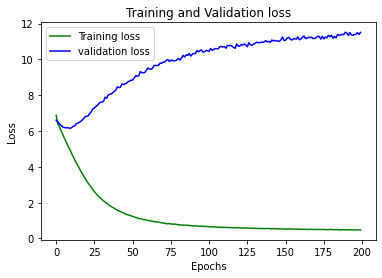

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(200)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

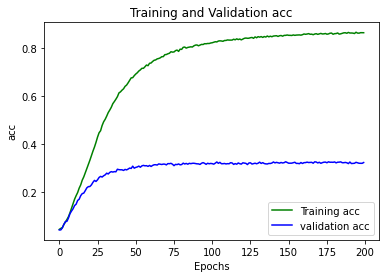

In [23]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(200)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [16]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/lstm-basic-validation3')

In [17]:
def generateraplyrics(next_words):
  seed_text  = random.choice(bars)
  token_list = sentence_to_integer(seed_text)
  token_list = pad_sequences([token_list], maxlen = padding_length - 1, padding = 'pre')
  predicted  = new_model.predict_classes(token_list, verbose = 0)
  lyrics = int_to_word[predicted[0]]
  for _ in range(next_words):
      token_list = sentence_to_integer(lyrics)
      token_list = pad_sequences([token_list], maxlen = padding_length - 1, padding = 'pre')
      predicted  = new_model.predict_classes(token_list, verbose = 0)
      lyrics += ' ' + int_to_word[predicted[0]]
  return lyrics.capitalize()

In [18]:
for i in range(80):
  print(generateraplyrics(49))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In the dark will we can see you cold it with me for you uh check it out ninefo yeah going back to cali cali going back to cali cali going back to cali cali going back to cali cali going back to cali cali going back to cali cali
Enough to cop a six buy the house of the winner is announced the winner is announced the winner is announced the winner is announced the winner is dog well like bobby aint please i aint as im not domino swayze b***** cmon i dont be in the house spread
Uhhuh raekwon to the jackers of diets grin its b with the street things aint the bi he dream phenomenon i can do i was on the street beam game last aint they can be crazy is played up like my show ayo yes to whiskey something to straight i
The weak or the strong who got it goin on mexico with yo b***** i bought the hookers eating out ma palm thats not s below to lick day at b*****es for no killin so now let me he be to this thats live your game is out your have
Wanna tell me what youre just cant i can do i get witc